<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

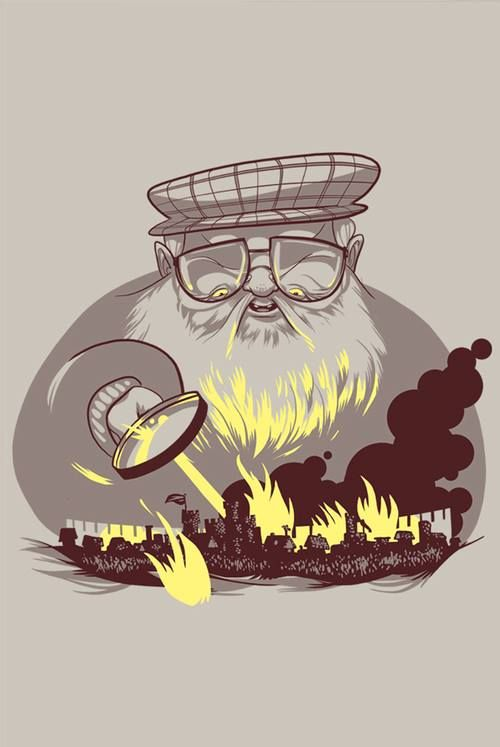

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 73.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 77.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
train = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
print(train.shape)
pd.set_option('display.max_columns', None)
train.head()

(1557, 25)


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [ ]:
test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
print(test.shape)
test.head()

(389, 24)


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,0,0,1,1,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,1,1,1,1,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [ ]:
y = train['isAlive']
train.drop('isAlive', axis=1, inplace=True)

In [ ]:
data = pd.concat([train, test])
data.shape

(1946, 24)

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.isna().sum(axis=0)

,0
name,0
title,1008
male,0
culture,1269
dateOfBirth,1513
mother,1925
father,1920
heir,1923
house,427
spouse,1670


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 1 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1946 non-null   object 
 1   title             938 non-null    object 
 2   male              1946 non-null   int64  
 3   culture           677 non-null    object 
 4   dateOfBirth       433 non-null    float64
 5   mother            21 non-null     object 
 6   father            26 non-null     object 
 7   heir              23 non-null     object 
 8   house             1519 non-null   object 
 9   spouse            276 non-null    object 
 10  book1             1946 non-null   int64  
 11  book2             1946 non-null   int64  
 12  book3             1946 non-null   int64  
 13  book4             1946 non-null   int64  
 14  book5             1946 non-null   int64  
 15  isAliveMother     21 non-null     float64
 16  isAliveFather     26 non-null     float64
 17  

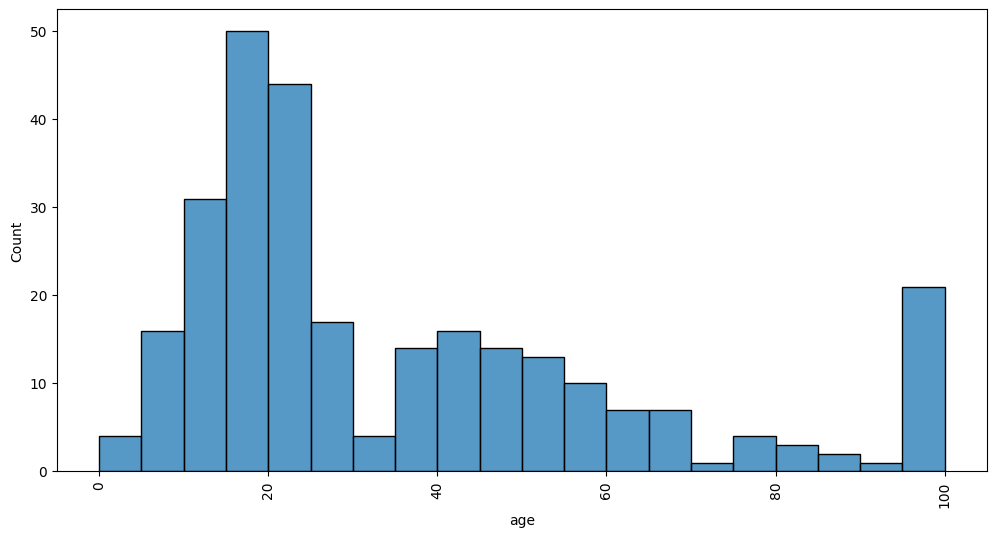

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(train, x='age', bins=20)
plt.xticks(rotation=90);

Данные имеют асимметричное распределение, поэтому в качестве заполнения NaN-значений колонки 'age', возьмем медиану:

In [ ]:
data['age'] = data['age'].fillna(train['age'].median())

Вычтем из отсчета времени дату рождения, т.к. максимальный возраст не показывается(отображается только до 100):

In [ ]:
data['date_calculated'] = 305 - data['dateOfBirth']

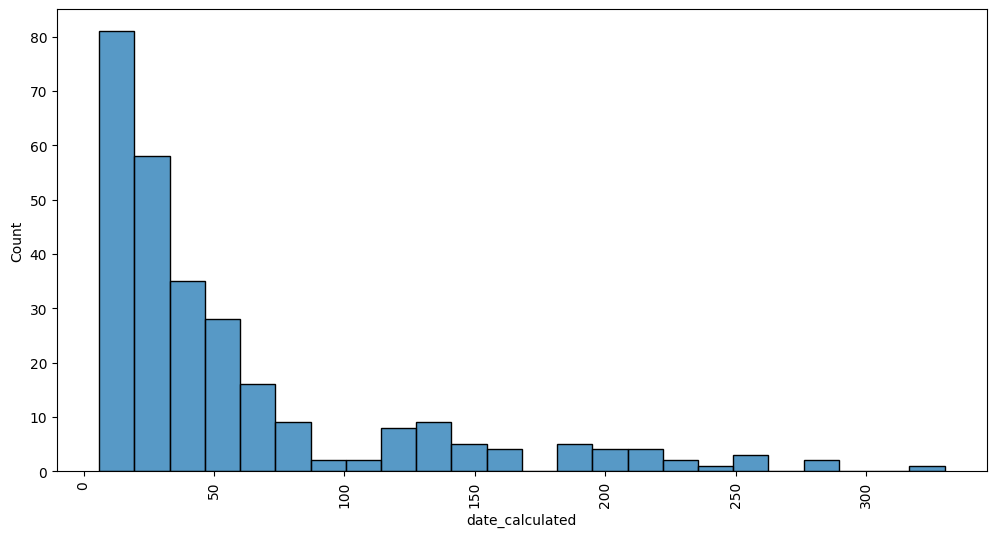

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[:len(train)], x='date_calculated')
plt.xticks(rotation=90);

NaN'ы заполняем медианой 'date_calculated' тренировочной выборки:

In [ ]:
med = data.loc[:len(train)]['date_calculated'].median()
data['date_calculated'] = data['date_calculated'].fillna(med)

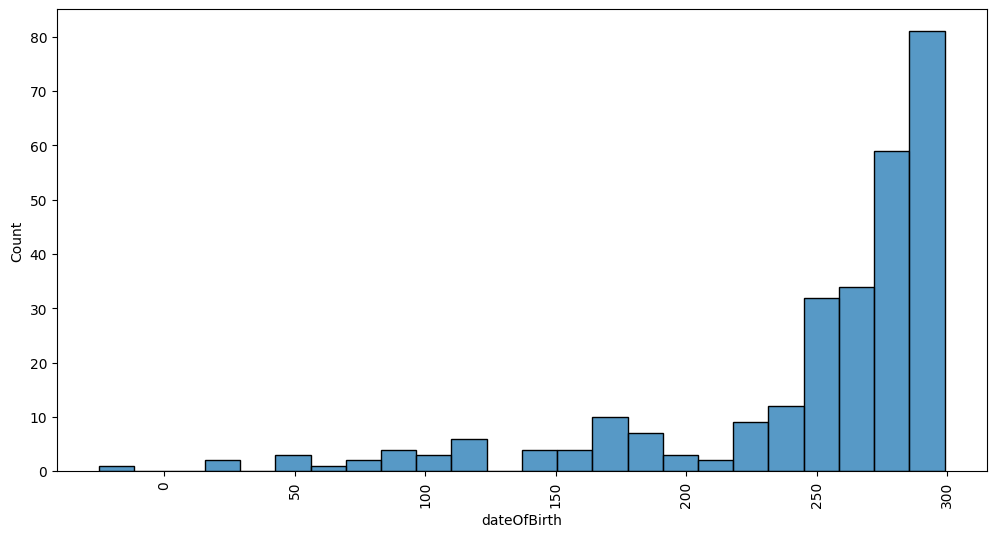

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[:len(train)], x='dateOfBirth')
plt.xticks(rotation=90);

Реализуем идею, что если у нас сумма даты рождения и возраста равняется 305, то вероятнее всего, человек выжил:

In [ ]:
data['dateOfBirth'].sort_values(ascending=False).head(3) # есть выбросы

,dateOfBirth
S.No,
1869,298299.0
1685,278279.0
1853,300.0


In [ ]:
birth_med = train['dateOfBirth'].median()
data['dateOfBirth'].fillna(birth_med)
data['dateOfBirth'] = data['dateOfBirth'].apply(lambda x: x if x <= 305 else birth_med)

In [ ]:
def calculate_survived(x):
    if x['age'] + x['dateOfBirth'] == 305:
        return 1
    else:
        return 0

data['isSurvived'] = data.apply(calculate_survived, axis=1)

In [ ]:
# оставляем признаки, где известные значения превышают 1/5 от общего количества
data.dropna(axis=1, thresh=(data.shape[0]*0.20), inplace=True)
data.drop(['dateOfBirth', 'age', 'title'], axis=1, inplace=True)

In [ ]:
data.sample(1)

,name,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,date_calculated,isSurvived
S.No,,,,,,,,,,,,,,,
1892,Tom of Sevenstreams,1,NaN,Brotherhood without banners,0,0,1,1,0,0,0,0,0.153846,65.0,1


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: True if x >= 1 else False)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

replacement_dict = {value: key for key, values in cult.items() for value in values}
data['culture'] = data['culture'].replace(replacement_dict)

In [ ]:
data.head()

,name,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,date_calculated,isSurvived,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,1,NaN,NaN,0,0,0,0,0,0,0,11,0.605351,33.0,0,1,True
2,Walder Frey,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,0.896321,97.0,1,1,True
3,Addison Hill,1,NaN,House Swyft,0,0,0,1,0,0,1,0,0.267559,33.0,0,0,False
4,Aemma Arryn,0,NaN,House Arryn,0,0,0,0,0,1,1,0,0.183946,223.0,0,0,False
5,Sylva Santagar,0,Dornish,House Santagar,0,0,0,1,0,1,1,0,0.043478,29.0,1,0,False


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.nunique()

,0
name,1946
male,2
culture,61
house,347
book1,2
book2,2
book3,2
book4,2
book5,2
isMarried,2


In [ ]:
data.drop(columns=['name', 'house'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
data.head()

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,date_calculated,isSurvived,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,1,NaN,0,0,0,0,0,0,0,11,0.605351,33.0,0,1,True
2,1,Rivermen,1,1,1,1,1,1,1,1,0.896321,97.0,1,1,True
3,1,NaN,0,0,0,1,0,0,1,0,0.267559,33.0,0,0,False
4,0,NaN,0,0,0,0,0,1,1,0,0.183946,223.0,0,0,False
5,0,Dornish,0,0,0,1,0,1,1,0,0.043478,29.0,1,0,False


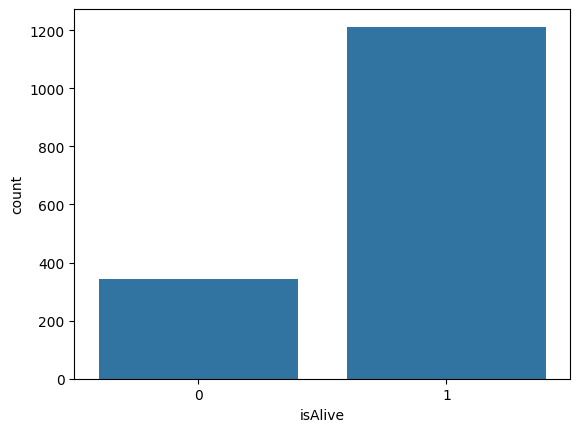

In [ ]:
sns.countplot(pd.DataFrame(y), x='isAlive');
# у нас несбалансированная категориальная целевая переменная

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
cat_columns = ['male', 'culture', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations', 'isSurvived'] ############################################## 'title'

In [ ]:
cat_features_data = data[cat_columns]

In [ ]:
unprocessed_cat_features = cat_features_data.select_dtypes(include=[object]).columns.to_list()

In [ ]:
unprocessed_cat_features

['culture']

In [ ]:
data[unprocessed_cat_features].head()

,culture
S.No,
1,NaN
2,Rivermen
3,NaN
4,NaN
5,Dornish


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# data['title'] = le.fit_transform(data['title']) #####################################################
data['culture'] = le.fit_transform(data['culture'])
data['boolDeadRelations'] = le.fit_transform(data['boolDeadRelations'])
data.head()

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,date_calculated,isSurvived,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,1,61,0,0,0,0,0,0,0,11,0.605351,33.0,0,1,1
2,1,41,1,1,1,1,1,1,1,1,0.896321,97.0,1,1,1
3,1,61,0,0,0,1,0,0,1,0,0.267559,33.0,0,0,0
4,0,61,0,0,0,0,0,1,1,0,0.183946,223.0,0,0,0
5,0,10,0,0,0,1,0,1,1,0,0.043478,29.0,1,0,0


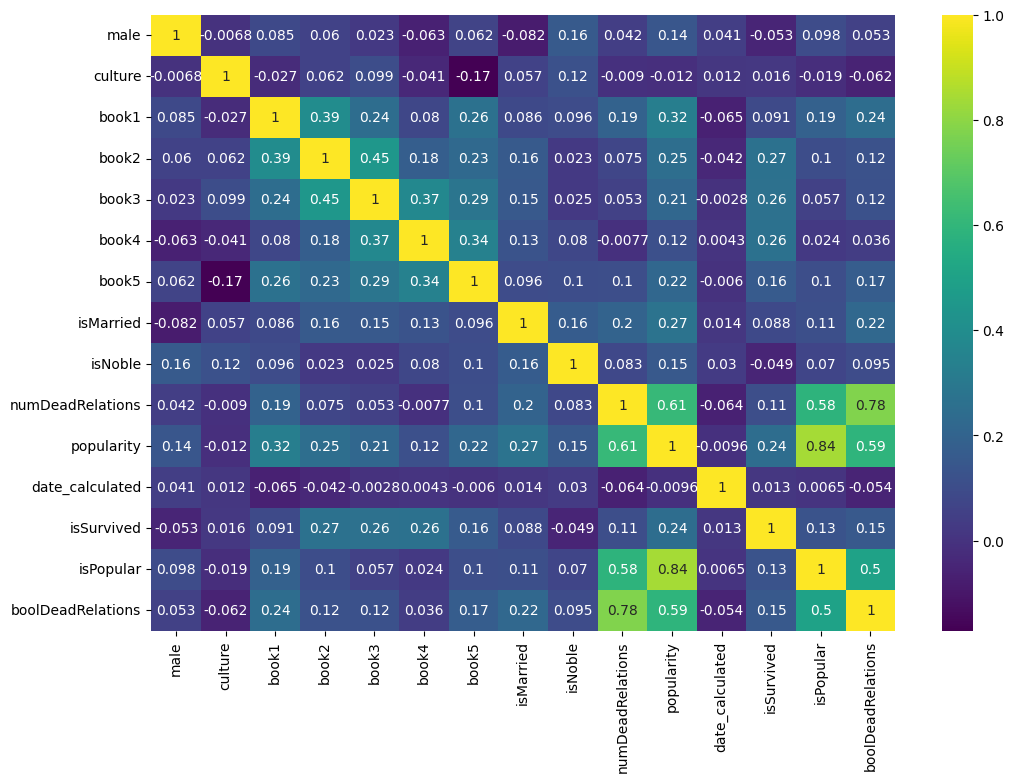

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='viridis');
# весьма сильная корреляция между numDeadRelations и popularity, а также между признаками, которые были созданы от другой переменной

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
data_and_target = pd.concat([data.iloc[:len(train)], y], axis=1)
data_and_target

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,date_calculated,isSurvived,isPopular,boolDeadRelations,isAlive
S.No,,,,,,,,,,,,,,,,
1,1,61,0,0,0,0,0,0,0,11,0.605351,33.0,0,1,1,0
2,1,41,1,1,1,1,1,1,1,1,0.896321,97.0,1,1,1,1
3,1,61,0,0,0,1,0,0,1,0,0.267559,33.0,0,0,0,1
4,0,61,0,0,0,0,0,1,1,0,0.183946,223.0,0,0,0,0
5,0,10,0,0,0,1,0,1,1,0,0.043478,29.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,61,1,0,1,1,0,0,1,0,0.160535,33.0,0,0,0,1
1554,0,61,1,1,0,0,0,0,0,0,0.040134,33.0,0,0,0,0
1555,1,61,0,1,1,1,1,0,0,0,0.076923,33.0,0,0,0,0


In [ ]:
data_and_target['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


In [ ]:
data_and_target[data_and_target['isPopular'] == 1]['isAlive'].value_counts()

,count
isAlive,
0,16
1,11


In [ ]:
data_and_target[data_and_target['isPopular'] == 0]['isAlive'].value_counts()

,count
isAlive,
1,1201
0,329


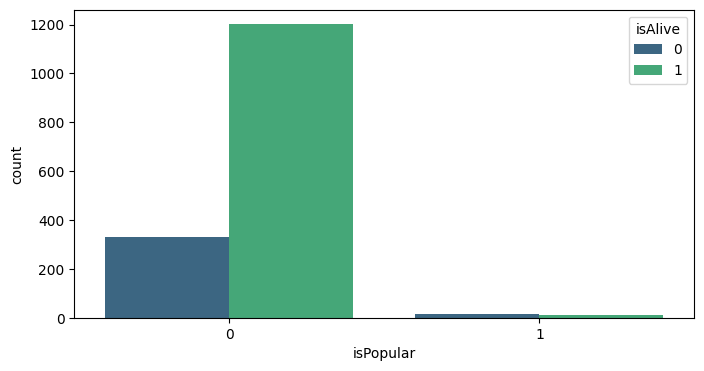

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data_and_target, x='isPopular', hue='isAlive', palette='viridis');
# хоть популярных было немного, но так или иначе, среди популярных людей выживали чаще

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# y уже создан выше
scaled_train = scaled_data[:len(train)]
scaled_test = scaled_data[len(train):]

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2, random_state=101)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()

# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)

In [1]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

gpc = GaussianProcessClassifier()
gpc.fit(X_train, y_train)
y_pred_gpc = gpc.predict(X_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

NameError: name 'RandomForestClassifier' is not defined

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8205


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_gpc)
print("Accuracy : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_gnb)
print("Accuracy : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_gb)
print("Accuracy : %.4f" % accuracy)

# как итог, лучше всего себя проявляет AdaBoost - 0.86

Accuracy : 0.8526
Accuracy : 0.8429
Accuracy : 0.8301
Accuracy : 0.3429
Accuracy : 0.8205
Accuracy : 0.8301
Accuracy : 0.7660
Accuracy : 0.8622


In [ ]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.76      0.41      0.53        64
           1       0.86      0.97      0.91       248

    accuracy                           0.85       312
   macro avg       0.81      0.69      0.72       312
weighted avg       0.84      0.85      0.83       312



Лучшая модель из предложенного - AdaBoost.

Но мы натренируем GradientBoosting!

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def train_model(model, grid_params, X_train, X_test, y_train, y_test):
    clf = model()

    grid_model = GridSearchCV(
        clf,
        param_grid=grid_params,
        n_jobs=-1,
        )

    grid_model.fit(X_train, y_train)

    y_pred = grid_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return grid_model, accuracy

In [ ]:
%%time
my_model = GradientBoostingClassifier
grid = {'n_estimators': [20, 50, 100, 200],
        'learning_rate': [1e-2, .05, 1e-1],
        'subsample': [.9, 1],
        # 'min_samples_split': [2, 4, 6],
        # 'min_samples_leaf': [1, 3, 5],
        'max_depth': [3, 5, 7],
        }

grid_model, grid_accuracy = train_model(my_model, grid, X_train, X_test, y_train, y_test)

CPU times: user 2.22 s, sys: 326 ms, total: 2.55 s
Wall time: 2min 4s


In [ ]:
grid_accuracy

0.8525641025641025

In [ ]:
final_pred = grid_model.predict(scaled_test)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.73MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission['isAlive'] = final_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)

## Что дало/не дало прирост:
- Из отсчета времени вычел дату рождения: помогло расширить данные возраста, т.к. Age указывался максимум до 100.
- Удалил, соответственно, Age & dateOfBirth, что дало прирост +0.02
- Балансировка данных ухудшила показатели -0.05
- Стандартизация с GB дала небольшой буст точности +0.002
- Удалил title +0.02 # 0.75064
- Нашел Gold Feature: создал переменную isSurvived # 0.832904

## Как итог, лучшим результатом оказалось значение метрики:
### 0.832904
